In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_row',None)

plt.rcParams['font.family'] ='NanumBarunGothic'
plt.rcParams['axes.unicode_minus'] =False

In [4]:
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv')
df.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [5]:
df = df.drop('Unnamed: 0', axis=1)
#결측값 및 데이터 형식 파악
df.info()
#Year 데이터, XX_Sales 데이터 변환 필요

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [6]:
df_copy = df.copy()

In [7]:
df_copy = df_copy.reset_index(drop=True)

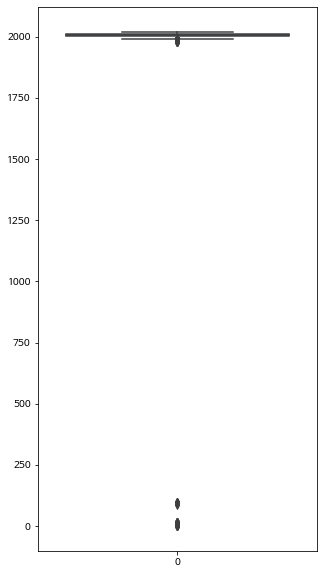

In [8]:
#Year 데이터 이상치 확인
plt.figure(figsize=(5,10))
sns.boxplot(data=df_copy['Year'])

Year 데이터에 2자리 이하로 존재하는 데이터 발견

In [9]:
#Year데이터 4자리 통일일
def year(x):
  if x <21:
    return x+2000
  elif x>21:
    return x+1900

In [10]:
#Year 이상 값 정정
err_year = df_copy[df_copy['Year']<1900]['Year']
err_year= err_year.apply(year)

In [ ]:
for i in err_year.index:
  df_copy['Year'].iloc[i] = err_year[i]

In [12]:
#이상값 처리 확인
df_copy.Year.describe()

count    16327.000000
mean      2006.406443
std          5.828981
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

In [13]:
df_copy.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [14]:
#Year Nan값 제거거
df_copy = df_copy.drop(df_copy[df_copy['Year'].isnull()].index)

In [15]:
index = df_copy[df_copy['Publisher'].isnull()].index

In [ ]:
#Publicsher Nan값 Unknown으로 변경경
df_copy['Publisher'][index] = 'Unknown'

**Nan 장르값 변경**

In [17]:
sports = ['NBA', 'NFL', 'Baseball', 'Hockey', 'Ski']
index_g = df_copy[df_copy['Genre'].isnull()].index

In [ ]:
for i in sports:
  for j in index_g:
    if df_copy['Name'][j].find(i)!=-1:
      df_copy['Genre'][j] = 'Sports'

In [ ]:
advanture = ['Escape', 'Pokemon', 'Mummy', 'Island', 'Treasure','Commando','Dragon','Chrono','Future','Fantasy']
for i in advanture:
  for j in index_g:
    if df_copy['Name'][j].find(i)!=-1:
      df_copy['Genre'][j] = 'Adventure'

In [ ]:
racing = ['Speed', 'Racing', 'Race', 'Car', 'Drive', ' Bike','GP']
for i in racing:
  for j in index_g:
    if df_copy['Name'][j].find(i)!=-1:
      df_copy['Genre'][j] = 'Racing'

In [ ]:
fight = ['Assault', 'Fight', 'Battle','Yakuza','Medabots']
for i in fight:
  for j in index_g:
    if df_copy['Name'][j].find(i)!=-1:
      df_copy['Genre'][j] = 'Fighting'

In [ ]:
action = ['Action', 'Grand Theft', 'Warriors', 'Blood', '007','War','Batman','Godfather']
for i in action:
  for j in index_g:
    if df_copy['Name'][j].find(i)!=-1:
      df_copy['Genre'][j] = 'Action'

In [ ]:
misc = ['Party', 'School', 'Sing', 'Logic', 'Music', 'Trivia','Board', 'Card']
for i in misc:
  for j in index_g:
    if df_copy['Name'][j].find(i)!=-1:
      df_copy['Genre'][j] = 'Misc'

In [ ]:
puzzle = ['Brain', 'Quest', 'Puzzle', 'Intelligence','Chess']
for i in puzzle:
  for j in index_g:
    if df_copy['Name'][j].find(i)!=-1:
      df_copy['Genre'][j] = 'Puzzle'

In [ ]:
role = ['Story']
for i in role:
  for j in index_g:
    if df_copy['Name'][j].find(i)!=-1:
      df_copy['Genre'][j] = 'Role-Playing'

In [26]:
#찾아봐도 잘 모르는 데이터 제거
df_copy = df_copy.dropna()

In [ ]:
#Year 소수점 제거
df_copy.Year = df_copy.Year.astype('int')

In [ ]:
#Sales 컬럼 숫자가 아닌 데이터 확인
df_copy[df_copy['NA_Sales'].str.contains('[^\d+.\d+]', regex=True)|df_copy['EU_Sales'].str.contains('[^\d+.\d+]', regex=True)|df_copy['JP_Sales'].str.contains('[^\d+.\d+]', regex=True)|df_copy['Other_Sales'].str.contains('[^\d+.\d+]', regex=True)]

In [29]:
#XX_Sales 컬럼 데이터 맞추기 M을 기준으로 통일일
def sales_trans(s):
  if s.find('K') != -1:
    return float(s.split('K')[0])*1000
  elif s.find('M') != -1:
    return float(s.split('M')[0])*1000000
  else:
    return float(s)*1000000

In [30]:
#XX_Sales 컬럼 가져오기기
sales_col =df_copy.columns[5:]

In [31]:
#데이터 형식 통일 Sales
for i in sales_col:
  df_copy[i]=df_copy[i].apply(sales_trans)

In [32]:
#Sales 컬럼 데이터 형식 통일 확인
df_copy.sample(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
11544,Momotarou Dentetsu 20-Shuunen,DS,2008,Misc,Hudson Soft,0.0,0.0,320000.0,0.0
15630,Angry Birds Star Wars,X360,2013,Strategy,Activision,160000.0,110000.0,0.0,30000.0
13038,Aikatsu! My No.1 Stage!,3DS,2015,Misc,Namco Bandai Games,0.0,0.0,70000.0,0.0
540,Pro Yakyuu Family Stadium '88,NES,1988,Sports,Namco Bandai Games,100000.0,0.0,1080000.0,0.0
15242,Personal Trainer: Math,DS,2007,Puzzle,Nintendo,490000.0,1120000.0,0.0,90000.0
14279,Senjou no Waltz,PSV,2014,Adventure,Idea Factory,0.0,0.0,20000.0,0.0
1410,Saihai no Yukue,DS,2008,Strategy,Tecmo Koei,0.0,0.0,30000.0,0.0
16041,Mafia II,PC,2010,Action,Take-Two Interactive,170000.0,170000.0,0.0,60000.0
9164,Hyakka Hyakurou: Sengoku Ninpoujou,PSV,2016,Adventure,D3Publisher,0.0,0.0,20000.0,0.0
5453,I Am In The Movie,PSP,2012,Simulation,Namco Bandai Games,0.0,0.0,60000.0,0.0


In [135]:
#전체 판매량 데이터 생성
df_copy['total'] = df_copy['NA_Sales']+df_copy['EU_Sales']+df_copy['JP_Sales']+df_copy['Other_Sales']

Text(0.5, 1.0, '데이터셋 분포 확인')

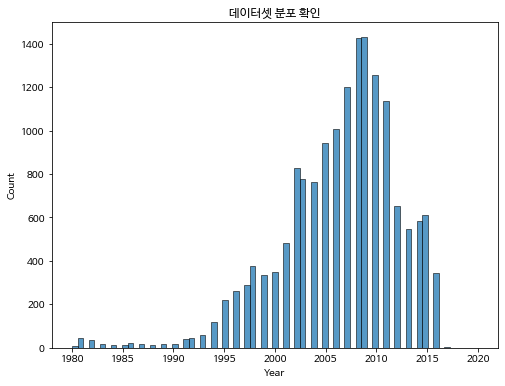

In [138]:
plt.figure(figsize=(8,6))
sns.histplot(df_copy['Year'])
plt.title('데이터셋 분포 확인')

In [108]:
#장르별 출고량
df_genre_sale = df_copy.groupby('Genre').sum()

In [109]:
df_genre_sale.reset_index(inplace=True)

In [110]:
df_genre_sale.sort_values('total', ascending=False, inplace=True)

In [111]:
df_genre_sale.drop('Year',axis=1,inplace=True)

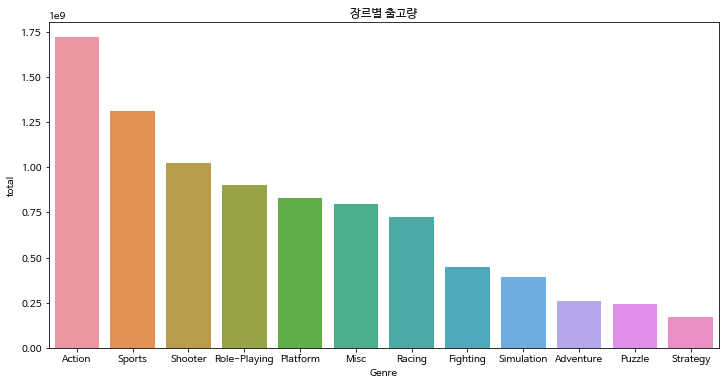

In [139]:
plt.figure(figsize=(12,6))
sns.barplot(x=df_genre_sale.Genre,y=df_genre_sale.total, data = df_genre_sale)
plt.title('장르별 출고량')
plt.show()

In [48]:
#플랫폼별 판매량량
df_plat = df_copy.groupby('Platform').sum()

In [49]:
df_plat.reset_index(inplace=True)

In [50]:
df_plat.sort_values('total',ascending=False, inplace=True)

In [51]:
df_plat.drop('Year',axis=1,inplace=True)

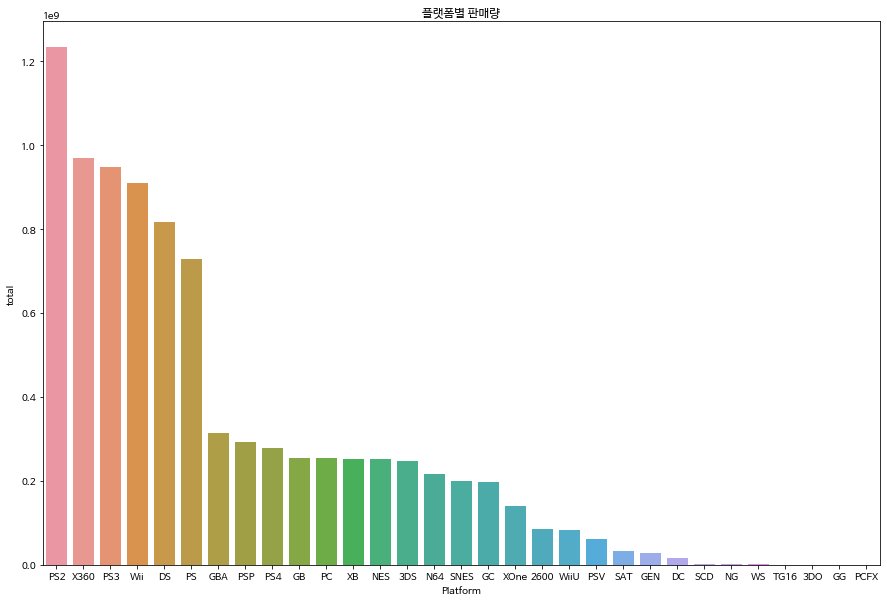

In [52]:
plt.figure(figsize=(15,10))
sns.barplot(x=df_plat.Platform,y=df_plat.total, data = df_plat)
plt.title('플랫폼별 판매량')
plt.show()

PS, XBOX, Nintendo

**지역별로 선호하는 게임 장르가 있을까?**

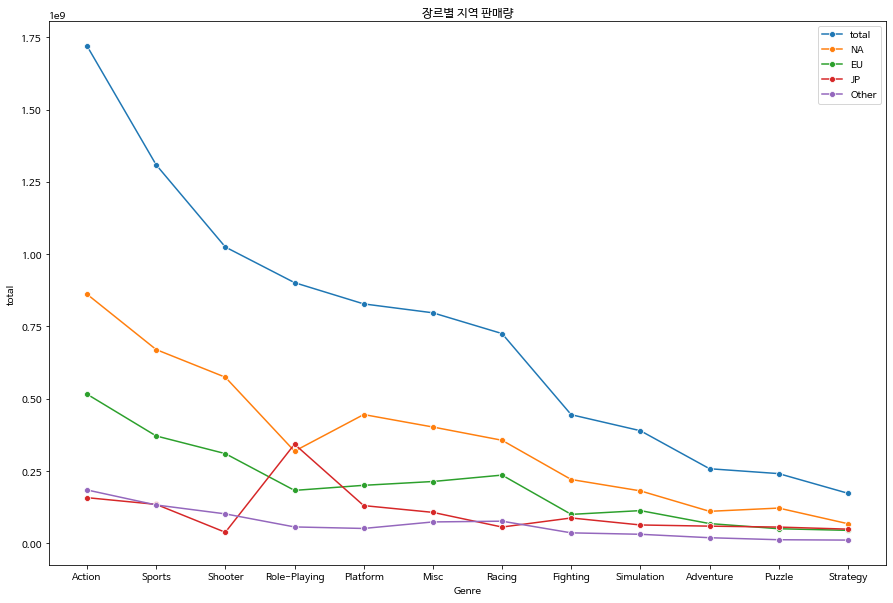

In [53]:
#어느 지역에 어느 장르가 많이 팔렸는지?
#지역에 따라서 선호하는 게임 장르가 다를까
plt.figure(figsize=(15,10))
sns.lineplot(data = df_genre_sale,x = df_genre_sale.Genre,y = df_genre_sale.total, label='total',marker='o')
sns.lineplot(data = df_genre_sale,x = df_genre_sale.Genre,y = df_genre_sale.NA_Sales, label='NA',marker='o')
sns.lineplot(data = df_genre_sale,x = df_genre_sale.Genre,y = df_genre_sale.EU_Sales, label = 'EU',marker='o')
sns.lineplot(data = df_genre_sale,x = df_genre_sale.Genre,y = df_genre_sale.JP_Sales, label='JP',marker='o')
sns.lineplot(data = df_genre_sale,x = df_genre_sale.Genre,y = df_genre_sale.Other_Sales, label='Other',marker='o')
plt.title('장르별 지역 판매량')
plt.legend()
plt.show()

북미와 유럽, 기타 국가들은 Action 장르의 출고량이 높고 그래프의 형태가 비슷하지만, 일본의 경우 롤플레잉 장르가 다른 장르에 비해 높은 출고량을 보인다.


In [54]:
#연도별 데이터터
df_80s = df_copy.query('Year>=1980 and Year<1990')
df_90s = df_copy.query('Year>=1990 and Year<2000')
df_00s = df_copy.query('Year>=2000 and Year<2010')
df_10s = df_copy.query('Year>=2010 and Year<=2020')

In [55]:
df_80s_g = df_80s.groupby('Genre').sum()
df_90s_g = df_90s.groupby('Genre').sum()
df_00s_g = df_00s.groupby('Genre').sum()
df_10s_g = df_10s.groupby('Genre').sum()

In [56]:
df_80s_g.sort_values('total', ascending=False, inplace=True)
df_90s_g.sort_values('total', ascending=False, inplace=True)
df_00s_g.sort_values('total', ascending=False, inplace=True)
df_10s_g.sort_values('total', ascending=False, inplace=True)

In [57]:
df_80s_g.reset_index(inplace=True)
df_90s_g.reset_index(inplace=True)
df_00s_g.reset_index(inplace=True)
df_10s_g.reset_index(inplace=True)

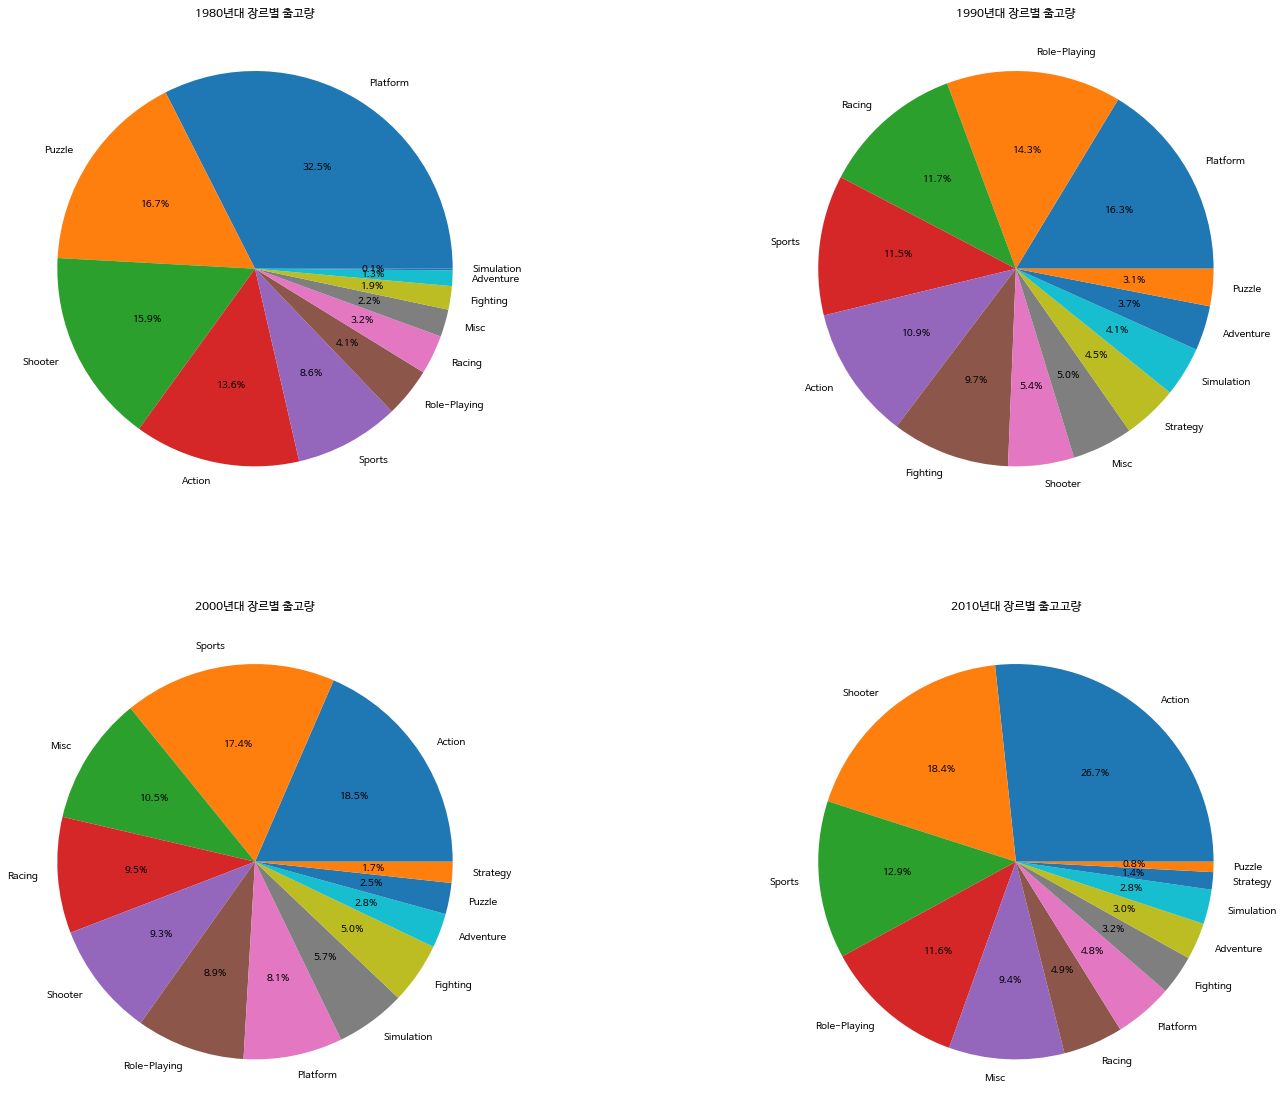

In [128]:
f, axes = plt.subplots(2,2)
f.set_size_inches((25,20))
# plt.subplots_adjust(wspace=0.2,hspace=0.3)
axes[0,0].set_title('1980년대 장르별 출고량')
# axes[0,0].bar(df_80s_g.Genre, df_80s_g.total )
axes[0,0].pie(df_80s_g.total, labels = list(df_80s_g.Genre),autopct='%1.1f%%')
axes[0,1].set_title('1990년대 장르별 출고량')
# axes[0,1].bar(df_90s_g.Genre, df_90s_g.total)
axes[0,1].pie(df_90s_g.total, labels = list(df_90s_g.Genre),autopct='%1.1f%%')
axes[1,0].set_title('2000년대 장르별 출고량')
# axes[1,0].bar(df_00s_g.Genre, df_00s_g.total)
axes[1,0].pie(df_00s_g.total, labels = list(df_00s_g.Genre),autopct='%1.1f%%')
axes[1,1].set_title('2010년대 장르별 출고고량')
# axes[1,1].bar(df_10s_g.Genre, df_10s_g.total)
axes[1,1].pie(df_10s_g.total, labels = list(df_10s_g.Genre),autopct='%1.1f%%')
plt.show()

**1980년대부터 플래폼과 롤플레잉 장르가 성장하다가 2000년대부터 action가 sports shooter 장르가 성장을 하였다.
이를 보면 연도별 트렌드는 계속 변화한다고 볼 수 있다.**

**위의 가설이 맞는지 확인해보기 위해 가설 검정을 수행**

**가설 검정**

**H0 : 년대와 장르는 관계가 없다.**

**H1 : 년대와 장르는 관계가 있다.**

In [59]:
df80 = df_copy.query('Year>=1980 and Year<1990').groupby('Genre')['total'].sum()
df90 = df_copy.query('Year>=1990 and Year<2000').groupby('Genre')['total'].sum()
df00 = df_copy.query('Year>=2000 and Year<2010').groupby('Genre')['total'].sum()
df10 = df_copy.query('Year>=2010 and Year<=2020').groupby('Genre')['total'].sum()

In [60]:
df_in = pd.DataFrame([df80,df90,df00,df10],index=['1980','1990','2000','2010'])
df_in=df_in.fillna(0)
pv = stats.chi2_contingency(df_in)
pv[1]

0.0

**pvalue가 0.0으로 귀무가설을 기각하여 년대와 장르는 관계가 있다.**

**시대에 따라 트렌드가 변화한다.**

**출고량이 높은 게임에 대한 분석 및 시각화 프로세스**

In [62]:
df_sort_total = df_copy.sort_values('total',ascending=False)
df_sort_total.reset_index(drop=True,inplace=True)

In [63]:
df_top_100 = df_sort_total[0:100]

In [64]:
df_top_100 = df_top_100[['Name','Platform','Year','Genre','Publisher','total']]
df_top_100.sort_values('total',ascending=False, inplace=True)

In [65]:
df100_g = df_top_100.groupby('Genre').sum().reset_index().sort_values('total',ascending=False)

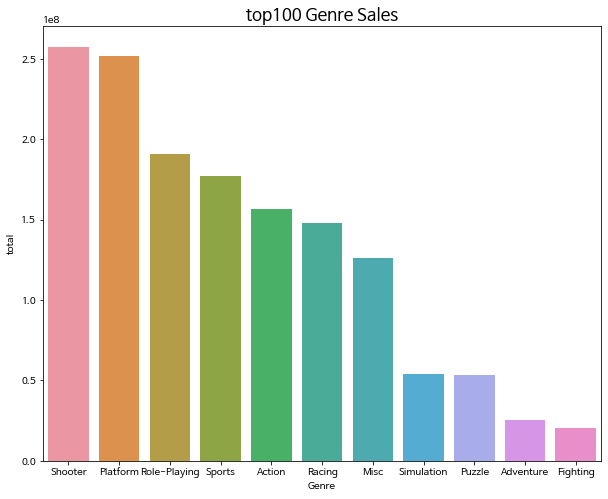

In [66]:
plt.figure(figsize=(10,8))
sns.barplot(x=df100_g.Genre, y=df100_g.total)
plt.title('top100 Genre Sales',fontdict={'fontsize':17})
plt.show()

In [67]:
df100_y = df_top_100.groupby('Year').sum().reset_index()

In [68]:
bins = ['1980','1985','1990','1995','2000','2005','2010','2015','2020']
labels = ['80-85','85-90','90-95','95-00','00-05','05-10','10-15','15-20']

df100_y['Year_Level'] = pd.cut(x=df100_y['Year'], bins=bins, labels = labels)

In [69]:
df100_y=df100_y.groupby('Year_Level').sum()['total'].reset_index()

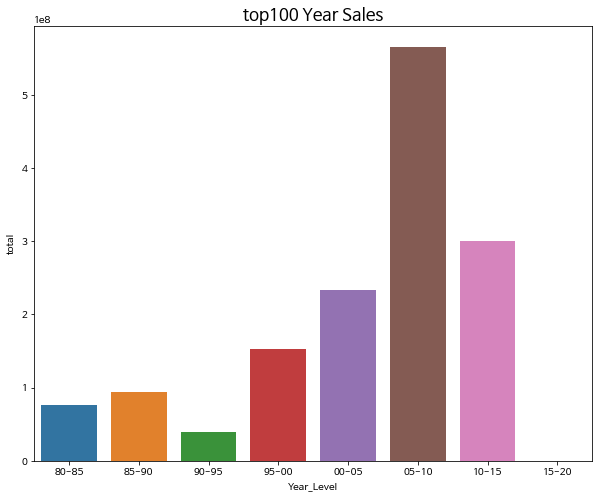

In [70]:
#top100 년도별 판매량
plt.figure(figsize=(10,8))
sns.barplot(x=df100_y.Year_Level, y=df100_y.total)
plt.title('top100 Year Sales',fontdict={'fontsize':17})
plt.show()

In [71]:
df100_p = df_top_100.groupby('Platform').sum().reset_index()

In [72]:
df100_p.sort_values('total', inplace=True, ascending = False)

In [73]:
df100_p.reset_index(drop=True, inplace=True)

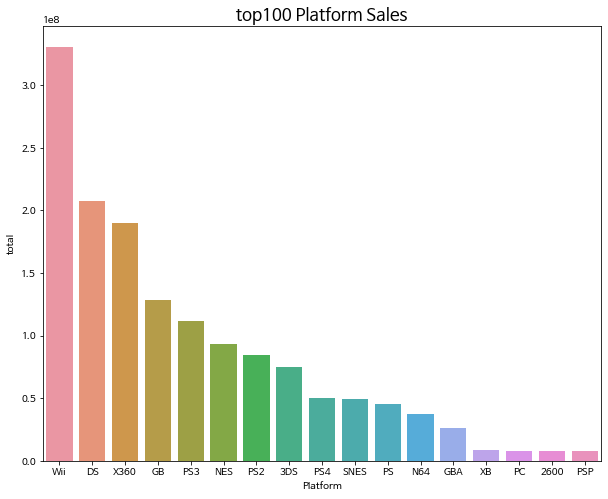

In [74]:
#top100 플랫폼별 판매량
plt.figure(figsize=(10,8))
sns.barplot(x=df100_p.Platform, y=df100_p.total)
plt.title('top100 Platform Sales',fontdict={'fontsize':17})
plt.show()

**닌텐도 플랫폼이 압도적으로 많은 출고량을 기록**

In [75]:
df100_pub = df_top_100.groupby('Publisher').sum().reset_index()

In [76]:
df100_pub.sort_values('total', inplace=True, ascending = False)

In [77]:
df100_pub.reset_index(drop=True, inplace=True)

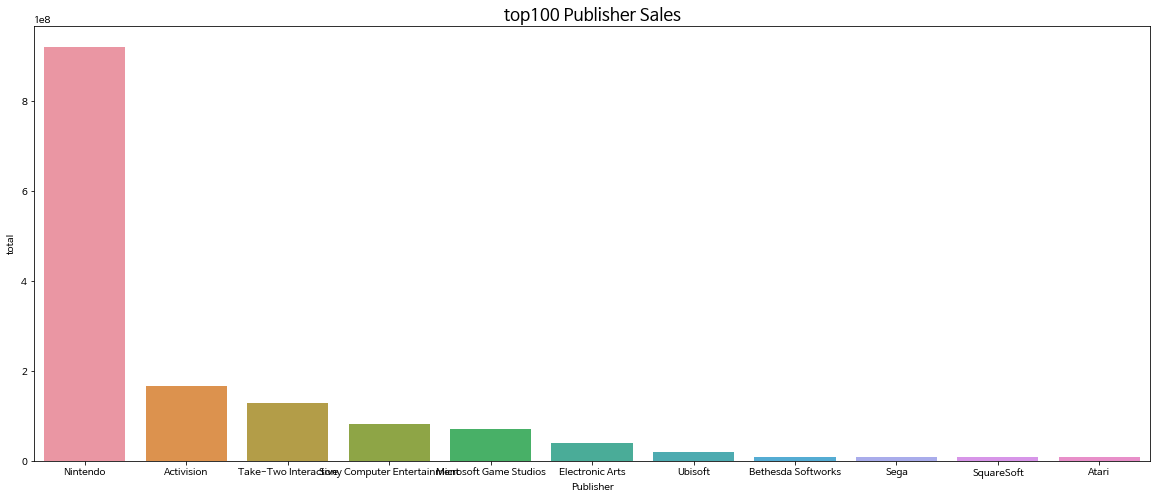

In [88]:
#top100 플랫폼별 판매량
plt.figure(figsize=(20,8))
sns.barplot(x=df100_pub.Publisher, y=df100_pub.total)
plt.title('top100 Publisher Sales',fontdict={'fontsize':17})
plt.show()

**출고량이 높은 게임에 대한 분석(top 100)**

**장르 : shooter, platform, role-playing**

**년대 : 2005~2015**

**플랫폼 : will, ds, x360**

**회사 : nintendo가 압도적, activision**

**Nintendo가 압도적으로 높은 출고량을 보여 다음 분기에 게임을 출시해야 성공 가능성이 높다고 생각한다.**

In [79]:
df_nin = df_copy[df_copy['Publisher']=='Nintendo'].reset_index(drop=True)

Text(0.5, 1.0, '닌텐도 장르별')

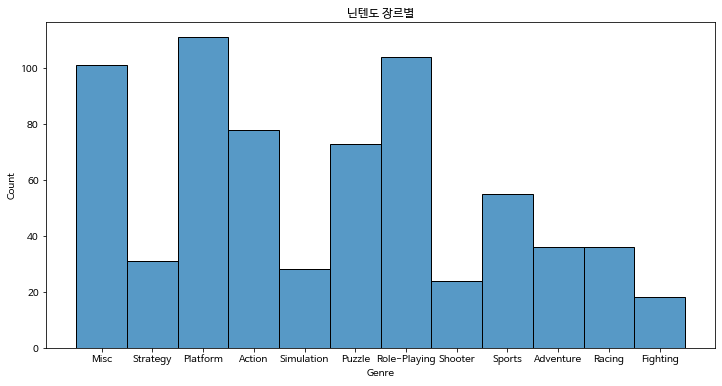

In [127]:
plt.figure(figsize=(12,6))
sns.histplot(df_nin['Genre'])
plt.title('닌텐도 장르별')

In [81]:
df_nin_sale = df_nin.groupby('Publisher').sum()

In [89]:
df_nin_sale=df_nin_sale[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']]

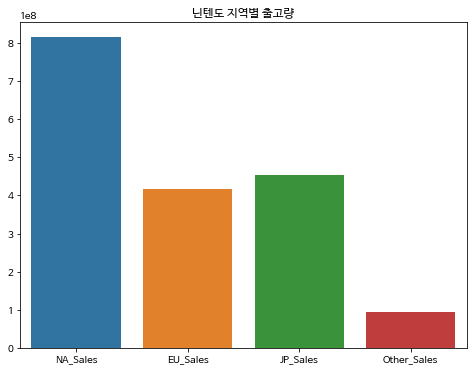

In [90]:
plt.figure(figsize=(8,6))
sns.barplot(data = df_nin_sale)
plt.title('닌텐도 지역별 출고량')
plt.show()

In [122]:
NA_Sale = df_nin.groupby('Genre').sum()['NA_Sales'].reset_index()

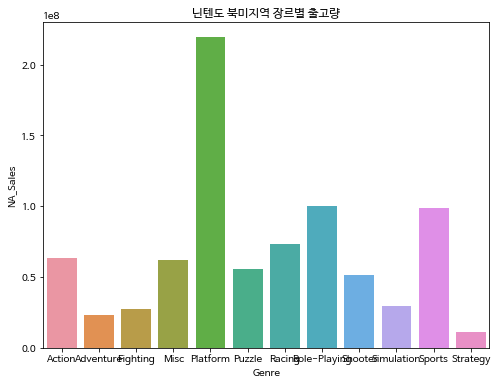

In [126]:
plt.figure(figsize=(8,6))
sns.barplot(x =NA_Sale.Genre, y = NA_Sale.NA_Sales,data = NA_Sale)
plt.title('닌텐도 북미지역 장르별 출고량')
plt.show()

In [84]:
df_nin_y=df_nin.groupby('Year').sum()[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','total']].reset_index()

In [85]:
bins = ['1980','1985','1990','1995','2000','2005','2010','2015','2020']
labels = ['80-85','85-90','90-95','95-00','00-05','05-10','10-15','15-20']

df_nin_y['Year_Level'] = pd.cut(x=df_nin_y['Year'], bins=bins, labels = labels)

In [86]:
df_nin_y=df_nin_y.groupby('Year_Level').sum()['total'].reset_index()

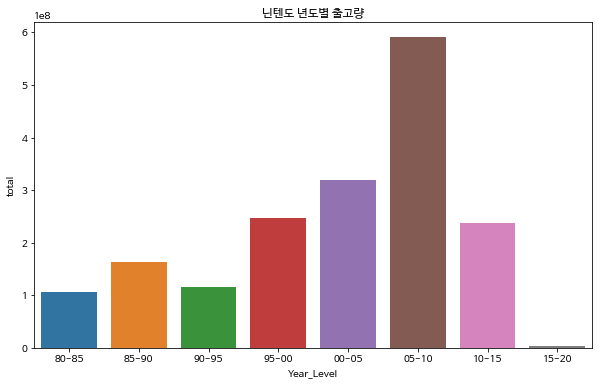

In [87]:
plt.figure(figsize=(10,6))
sns.barplot(x=df_nin_y.Year_Level, y =df_nin_y.total)
plt.title('닌텐도 년도별 출고량')
plt.show()

**출시 회사 : Nintedo**


**출시 지역역 : 북미 지역**

**출시 장르 : Platform, Role-Playing 장르**